In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score

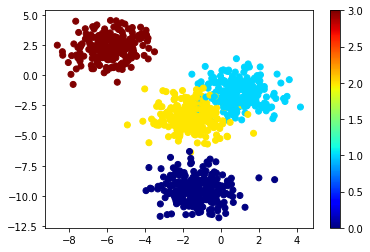

In [4]:
CENTERS = 4
X, y = make_blobs(n_samples=1000, n_features=2, centers=CENTERS, random_state=2)

plt.scatter(X.T[0], X.T[1], c=y,cmap="jet")
plt.colorbar()

In [5]:
y.shape

(1000,)

In [6]:
y = (
        y.reshape(-1, 1) == np.arange(CENTERS)
    )

In [7]:
y.shape

(1000, 4)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Softmax

Using TensorFlow backend.


In [9]:
model=Sequential()
model.add(Dense(8,input_shape=(2,), activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(8,activation="tanh"))

In [10]:
model.add(Dense(4, activation="sigmoid"))
model.add(Softmax())

In [11]:
from keras.optimizers import SGD
LEARNING_RATE = 0.01
sgd_instance = SGD(lr=LEARNING_RATE)
model.compile(optimizer=sgd_instance,loss="categorical_crossentropy")

In [12]:
from sklearn.model_selection import train_test_split
EPOCHS=400
BATCH_SIZE=5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_train

array([[False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       ...,
       [ True, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False]])

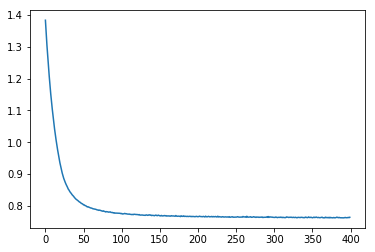

In [14]:
history=model.fit(X_train,y_train,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=0)
history.history['loss']
plt.plot(history.history['loss']) 
#grafikte takilma yoksa devamli dusus varsa yüksek score için epoch sayisini arttirabiliriz 

In [14]:
#kucuk batch cok daha cabuk yakinsadi

In [15]:
y_pred= model.predict(X_test)

In [16]:
y_pred[:5]

array([[0.17525692, 0.1756474 , 0.17515017, 0.4739455 ],
       [0.17542641, 0.1755682 , 0.4740343 , 0.17497109],
       [0.17537828, 0.47363654, 0.17557786, 0.1754073 ],
       [0.17545135, 0.17554782, 0.47403792, 0.17496292],
       [0.17526397, 0.1755194 , 0.17519495, 0.47402167]], dtype=float32)

In [17]:
#z = np.random.randn(6,3)  # o satırda en büyük elemen kaçıncı sıradaysa onu veriyor
#z

In [18]:
#z.argmax(axis=1)

In [19]:
#z.argmax(axis=0)

In [20]:
#z.argmax()

In [22]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1) 
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

0.97

In [23]:
y_pred_train=model.predict(X_train)
accuracy_score(y_train.argmax(axis=1),y_pred_train.argmax(axis=1))

0.98375

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

In [25]:
precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1),average="micro")

0.97

In [26]:
recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1),average="micro")

0.97

In [27]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[49,  0,  0,  0],
       [ 0, 49,  3,  0],
       [ 0,  3, 44,  0],
       [ 0,  0,  0, 52]], dtype=int64)

In [28]:
confusion_matrix(y_train.argmax(axis=1), y_pred_train.argmax(axis=1))
#yukardan aşağı tahminlerimiz soldansağa gerçekler

array([[201,   0,   0,   0],
       [  0, 194,   4,   0],
       [  1,   8, 194,   0],
       [  0,   0,   0, 198]], dtype=int64)

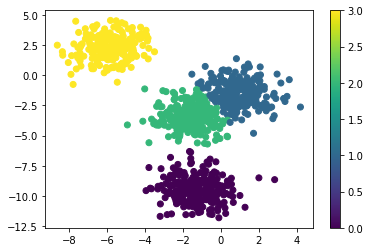

In [29]:
plt.scatter(X.T[0], X.T[1], c=model.predict(X).argmax(axis=1))
plt.colorbar()

In [30]:
model.save("Neural_Network_Multiclass_classification.h5")